# Baseline Model

In [1]:
import keras
import random
import tensorflow as tf
import keras.backend as K
from keras.models import Model
from keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, Nadam
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
np.random.seed(42) # NumPy
random.seed(42) # Python
tf.random.set_seed(42) # Tensorflow

## Importing Data

In [5]:
train_data = pd.read_pickle('train_knn_scaled.pkl')
test_data = pd.read_pickle('test_knn_scaled.pkl')

In [6]:
train_data.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C9,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V18,V20,V30,V36,V37,V40,V44,V47,V48,V52,V54,V60,V70,V76,V78,V80,V81,V82,V87,V91,V99,V127,V130,V131,V139,V147,V156,V165,V166,V169,V171,V173,V174,V175,V176,V180,V183,V185,V195,V198,V203,V205,V207,V209,V210,V215,V216,V220,V221,V223,V230,V234,V235,V238,V240,V241,V250,V252,V257,V258,V260,V262,V263,V264,V265,V268,V271,V274,V277,V282,V283,V289,V291,V303,V307,V310,V312,V315,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_33,id_35,id_36,id_37,DeviceType,DeviceInfo,TransactionHR,TransactionMT,TransactionDW,dollars,cents,P_parent_domain,P_domain_name,P_top_level_domain,card1_div_1000,card2_div_10,R_parent_domain,R_domain_name,R_top_level_domain,device_name,device_version,os_name,os_version,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,-1.577987,-0.278167,4,3417,500,42,1,38,1,166,65,-0.137532,31,31,-0.098020,-0.092260,-0.059438,-0.21606,-0.112869,-0.046146,-0.208712,-0.087363,-0.047034,-0.243806,-0.147247,-0.509782,-0.503333,-0.189393,-0.764989,-0.460267,-1.195934,-0.103737,-4.513538,-0.563826,-1.045689,-1.416108,-1.833103,-0.195921,-0.766342,1,1,1,2,0,1,2,2,2,0.010592,-0.175584,0.254143,-0.138091,-0.107737,-1.399366,0.890708,-0.540222,0.461255,-0.664176,0.061639,-0.193368,-0.50417,-0.168338,-0.142639,-0.809739,-0.366593,0.851647,-0.51961,-0.664404,0.913909,-0.234737,-0.521953,-0.508172,-1.749900,-0.208365,-0.694394,-0.328713,-0.051788,-0.291683,-0.193128,-0.925854,-0.085075,-1.348424,0.712571,2.676527,-0.910925,-0.280643,-1.102703,-1.135389,-0.963413,-0.639484,-0.074947,-0.080622,-0.121898,1.288134,1.113841,-0.069666,-0.417482,-0.155259,-0.470968,-0.910392,-0.063384,-0.051487,-0.865095,-0.430636,-1.072947,-0.465980,-0.091838,-0.097009,-0.110508,-0.009912,-0.004928,0.202858,-0.045803,-0.093392,-0.074128,0.045677,-0.02215,-0.131410,-0.093252,-0.105377,-0.261197,-0.936267,-0.047519,-0.043218,0.198889,0.006181,-0.394673,-0.040598,-0.454041,-0.066412,-0.334849,-0.227587,-0.230241,0.540805,-0.925067,5.187305,0.029746,-0.555474,0.369252,3.588854,0.106113,0.115225,2,54,3,2,104,522,394,2,2,74,260,2,2,2,1,1735,-1.822224,-1.714835,5,-0.278668,-0.447183,16,24,7,4,51,16,24,8,13,293,7,68,0
2987001,-1.577986,-0.443327,4,7922,303,42,2,2,1,173,65,-0.102667,16,31,-0.098020,-0.092260,-0.059438,-0.21606,-0.112869,-0.046146,-0.268682,-0.097964,-0.047034,-0.243806,-0.147247,-0.598665,-0.503333,-0.210014,-0.764989,-0.460267,-1.195934,-0.103737,-4.513538,-0.638507,-1.093292,-1.416108,-1.833103,-0.195921,-0.766342,2,2,2,0,1,1,2,2,2,0.010592,-0.175584,0.254143,-0.138091,-0.107737,-1.399366,-0.977175,-0.540222,0.461255,-0.664176,-0.925159,-0.193368,-0.50417,-0.168338,-0.142639,-0.809739,-0.366593,-0.999398,-0.51961,-0.664404,-0.959375,-0.234737,-0.521953,-0.508172,0.498307,-0.208365,-0.694394,-0.328713,-0.079398,-0.291683,-0.193128,-0.925854,-0.085075,-1.348424,0.712571,2.676527,-0.910925,-0.280643,-1.102703,-1.135389,-0.963413,-0.639484,-0.074947,-0.080622,-0.121898,1.288134,1.113841,-0.069666,-0.417482,-0.155259,-0.470968,-0.910392,-0.063384,-0.051487,-0.865095,-0.430636,-1.072947,-0.465980,-0.091838,-0.097009,-0.110508,-0.009912,-0.004928,0.202858,-0.045803,-0.093392,-0.074128,0.045677,-0.02215,-0.131410,-0.093252,-0.105377,-0.261197,-0.936267,-0.047519,-0.043218,0.198889,0.006181,-0.394673,-0.040598,-0.454041,-0.093051,-0.334849,-0.227587,-0.230241,0.540805,-0.925067,5.187305,0.029746,-0.555474,0.369252,3.588854,0.106113,0.115225,2,54,3,2,104,522,394,2,2,74,260,2,2,2,1,1735,-1.822224,-1.714835,5,-0.441734,-0.475884,12,15,2,10,30,16,24,8,13,293,7,68,0
2987002,-1.577972,-0.317889,4,938

In [7]:
test_data.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C9,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V18,V20,V30,V36,V37,V40,V44,V47,V48,V52,V54,V60,V70,V76,V78,V80,V81,V82,V87,V91,V99,V127,V130,V131,V139,V147,V156,V165,V166,V169,V171,V173,V174,V175,V176,V180,V183,V185,V195,V198,V203,V205,V207,V209,V210,V215,V216,V220,V221,V223,V230,V234,V235,V238,V240,V241,V250,V252,V257,V258,V260,V262,V263,V264,V265,V268,V271,V274,V277,V282,V283,V289,V291,V303,V307,V310,V312,V315,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_33,id_35,id_36,id_37,DeviceType,DeviceInfo,TransactionHR,TransactionMT,TransactionDW,dollars,cents,card1_div_1000,card2_div_10,P_parent_domain,P_domain_name,P_top_level_domain,R_parent_domain,R_domain_name,R_top_level_domain,device_name,device_version,os_name,os_version
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,2.389081,-0.430993,4,365,10,42,4,108,2,52,65,-0.211364,16,31,-0.060586,-0.059933,-0.059438,-0.099722,-0.070916,-0.046146,0.091141,-0.055562,-0.035495,0.637423,-0.046327,2.061453,2.074766,0.099300,1.617725,-0.239570,2.172352,-0.207859,-4.513538,1.762789,0.345759,-1.416108,-1.833103,-0.195921,1.350894,1,1,0,3,2,0,1,1,1,0.010592,-0.175584,0.254143,-0.138091,-0.107737,0.717255,-0.977175,-0.540222,-1.621760,-0.664176,1.048437,-0.193368,-0.50417,-0.168338,-0.142639,0.829141,-0.366593,-0.999398,-0.51961,-0.664404,-0.959375,-0.234737,-0.521953,-0.508172,0.498307,-0.208365,1.128298,0.038680,-0.068083,-0.139885,-0.193128,-0.234535,-0.085075,-0.025678,-0.767286,-0.898062,-0.910925,-0.280643,-1.102703,-0.140312,-0.148507,-0.639484,-0.074947,-0.080622,-0.121898,1.288134,1.113841,-0.065172,-0.417482,-0.155259,-0.317466,-0.587631,-0.063384,-0.051487,-0.865095,-0.430636,-1.072947,-0.46598,-0.091838,-0.097009,-0.110508,-0.009912,-0.004928,0.202858,-0.045803,-0.093392,-0.074128,0.045677,-0.02215,-0.13141,-0.093252,-0.105377,-0.261197,-0.936267,-0.047519,-0.043218,-0.886776,-0.635981,-0.394673,-0.040598,-0.454041,-0.082133,-0.199006,-0.227587,-0.230241,-1.443297,-0.434898,-0.09613,0.029746,-0.732580,0.670863,-0.07907,0.106113,0.115225,2,54,3,2,104,522,394,2,2,74,260,2,2,2,1,1735,-1.822224,-1.714835,0,-0.433372,0.069444,1,1,12,15,2,16,24,8,13,293,7,68
3663550,2.389090,-0.359702,4,9099,10,42,4,108,2,151,65,-0.199059,2,31,-0.083047,-0.085795,-0.059438,-0.216060,-0.112869,-0.046146,-0.148741,-0.097964,-0.035495,-0.158775,-0.127063,0.347296,0.141192,-0.313119,3.030591,-0.507081,2.172352,-0.207859,-4.513538,0.688525,3.502151,1.809139,-1.833103,-0.195921,2.515632,1,0,0,0,2,0,2,2,2,0.010592,-0.175584,0.254143,-0.138091,-0.107737,-1.399366,0.890708,-0.540222,0.461255,-0.664176,1.048437,-0.193368,-0.50417,-0.168338,-0.142639,-0.809739,-0.366593,-0.999398,-0.51961,-0.664404,0.913909,-0.234737,-0.521953,-0.508172,0.498307,-0.208365,-0.694394,1.140862,-0.013322,0.594728,0.284777,-0.234535,-0.085075,-0.025678,-0.767286,-0.898062,-0.910925,-0.280643,-1.102703,-0.140312,-0.148507,-0.639484,-0.074947,-0.080622,-0.121898,1.288134,1.113841,-0.065172,-0.417482,-0.155259,-0.317466,-0.587631,-0.063384,-0.051487,-0.865095,-0.430636,-1.072947,-0.46598,-0.091838,-0.097009,-0.110508,-0.009912,-0.004928,0.202858,-0.045803,-0.093392,-0.074128,0.045677,-0.02215,-0.13141,-0.093252,-0.105377,-0.261197,-0.936267,-0.047519,-0.043218,-0.886776,-0.635981,-0.394673,-0.040598,-0.454041,-0.029298,0.458398,0.219758,-0.230241,-1.443297,-0.434898,-0.09613,0.029746,-0.732580,0.670863,-0.07907,0.106113,0.115225,2,54,3,2,104,522,394,2,2,74,260,2,2,2,1,1735,-1.822224,-1.656903,0,-0.358110,-0.475884,12,1,2,2,2,16,24,8,13,293,7,68
3663551,2.389100,0.150412,4,9245,473,42,4,108,2,280,65,10.592751,19,31,-0.

In [8]:
train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)

In [9]:
drop_cols = ['TransactionDT', 'TransactionHR', 'TransactionMT', 'TransactionDW']

In [10]:
train_data.drop(drop_cols, inplace=True, axis=1)
test_data.drop(drop_cols, inplace=True, axis=1)

In [11]:
X = train_data.drop(['isFraud'], axis=1)
y = train_data['isFraud']

In [12]:
X_test = test_data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

In [15]:
X_train.shape

(472432, 171)

In [16]:
X_val.shape

(118108, 171)

In [17]:
y_train.shape

(472432,)

In [18]:
y_val.shape

(118108,)

## Baseline Architecture

In [19]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

## Callbacks

In [41]:
# from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix

# class EvaluationMetrics(Callback):
#     def __init__(self, validation_data):
#         super().__init__()
#         self.validation_data = validation_data

#     def on_epoch_end(self, epoch, logs={}):
#         x_val, y_val = self.validation_data
#         y_pred = self.model.predict(x_val)

#         roc_auc = roc_auc_score(y_val, y_pred)
#         logs['val_roc_auc'] = roc_auc

#         y_pred_labels = (y_pred > 0.5).astype(int)
#         recall = recall_score(y_val, y_pred_labels)
#         logs['val_recall'] = recall

#         tn, fp, fn, tp = confusion_matrix(y_val, y_pred_labels).ravel()
#         false_positive_rate = fp / (fp + tn)
#         logs['false_positive_rate'] = false_positive_rate

#         print(f'ROC-AUC: {roc_auc:.4f} - Recall: {recall:.4f} - False Positive Rate: {false_positive_rate:.4f}')


In [42]:
# class RecallCallback(Callback):
#     def __init__(self, validation_data):
#         super().__init__()
#         self.validation_data = validation_data
#         self.fpr_epoch = 10

#     def on_epoch_end(self, epoch, logs={}):
#         if epoch % self.fpr_epoch == 0:
#             x_val, y_val = self.validation_data
#             y_pred = self.model.predict(x_val)
#             y_pred_labels = (y_pred > 0.5).astype(int)
#             tn, fp, fn, tp = confusion_matrix(y_val, y_pred_labels).ravel()
#             false_positive_rate = fp / (fp + tn)
#             logs['false_positive_rate'] = false_positive_rate
#             print(f"Epoch {epoch} => ROC-AUC: {logs['val_auc']:.4f} - Recall: {logs['val_recall']:.4f} - False Positive Rate: {false_positive_rate:.4f}")
#         else:
#             logs['false_positive_rate'] = np.nan
#             print(f"Epoch {epoch} => ROC-AUC: {logs['val_auc']:.4f} - Recall: {logs['val_recall']:.4f}")

In [20]:
checkpoint_callback = ModelCheckpoint(
    filepath='model/model_{epoch:02d}_{val_recall:.2f}.h5',
    monitor="val_recall", # monitor the validation recall
    save_best_only=True, # save only the best performing model
    save_weights_only=True, # save only the weights of the model, not the entire model
    mode="max", # maximize the validation recall
    verbose=1 # print messages when saving the model,
)

In [14]:
# checkpoint_callback = ModelCheckpoint(
#     filepath="model_checkpoint.h5", # where to save the model checkpoint
#     monitor="val_recall", # monitor the validation recall
#     save_best_only=True, # save only the best performing model
#     save_weights_only=True, # save only the weights of the model, not the entire model
#     mode="max", # maximize the validation recall
#     verbose=1 # print messages when saving the model
# )

In [16]:
# evaluation_metrics_callback = EvaluationMetrics(validation_data = (X_val, y_val))

In [17]:
# recall_callback = RecallCallback(validation_data=(X_val, y_val))

In [21]:
early_stopping_callback = EarlyStopping(monitor='val_recall', patience=10)

In [27]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_recall', factor=0.1, patience=8, min_lr=0, mode='max', cooldown=2)

In [24]:
print(tf.test.gpu_device_name())
print(tf.config.list_physical_devices('GPU'))

/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [25]:
(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
K.clear_session()

In [36]:
X_train.shape[1]

171

In [30]:
# define the ANN model
model = keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

recall = tf.keras.metrics.Recall(name='recall')
auc = tf.keras.metrics.AUC(name='auc')

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[auc, recall])

# fit the model on the training data
hist = model.fit(X_train, y_train, epochs=50, batch_size=2048, validation_data=(X_val, y_val), verbose=1, callbacks=[reduce_lr, checkpoint_callback])

Epoch 1/50
231/231 [==============================] - ETA: 0s - loss: 9.1796 - auc: 0.5286 - recall: 0.0836
Epoch 1: val_recall improved from -inf to 0.01016, saving model to model/model_01_0.01.h5
231/231 [==============================] - 105s 451ms/step - loss: 9.1796 - auc: 0.5286 - recall: 0.0836 - val_loss: 7.8838 - val_auc: 0.5070 - val_recall: 0.0102 - lr: 0.0010
Epoch 2/50
229/231 [============================>.] - ETA: 0s - loss: 6.3848 - auc: 0.5534 - recall: 0.1252
Epoch 2: val_recall improved from 0.01016 to 0.01040, saving model to model/model_02_0.01.h5
231/231 [==============================] - 5s 20ms/step - loss: 6.4220 - auc: 0.5530 - recall: 0.1244 - val_loss: 10.7185 - val_auc: 0.5064 - val_recall: 0.0104 - lr: 0.0010
Epoch 3/50
228/231 [============================>.] - ETA: 0s - loss: 3.9168 - auc: 0.5951 - recall: 0.1859
Epoch 3: val_recall improved from 0.01040 to 0.09267, saving model to model/model_03_0.09.h5
231/231 [==============================] - 4s 18ms

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               44032     
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 60,545
Trainable params: 60,545
Non-trainable params: 0
_________________________________________________________________


In [33]:
import seaborn as sns

<Axes: xlabel='epoch', ylabel='recall'>

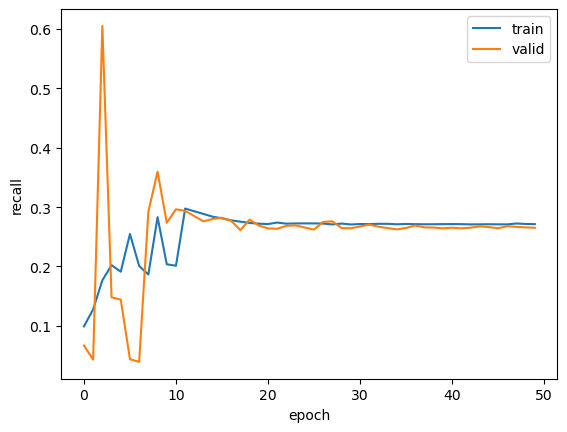

In [26]:
history_df = pd.DataFrame(hist.history)
history_df['epoch'] = hist.epoch

sns.lineplot(data = history_df, x='epoch', y='recall', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_recall', label='valid')

ini yang awal mei apa ya wkwk

<Axes: xlabel='epoch', ylabel='recall'>

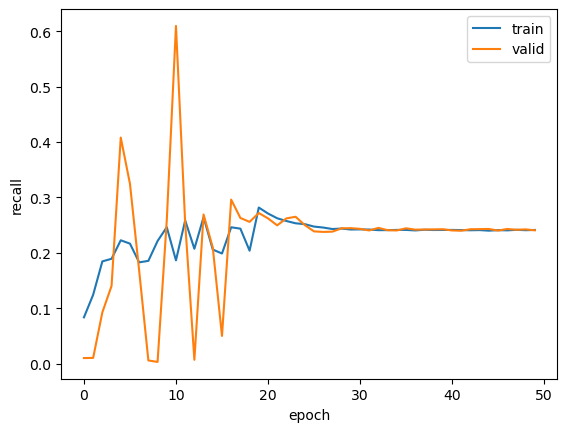

In [34]:
history_df = pd.DataFrame(hist.history)
history_df['epoch'] = hist.epoch

sns.lineplot(data = history_df, x='epoch', y='recall', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_recall', label='valid')

<Axes: xlabel='epoch', ylabel='auc'>

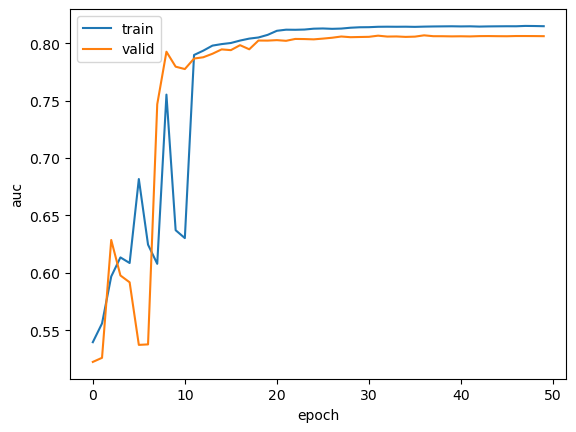

In [27]:
sns.lineplot(data = history_df, x='epoch', y='auc', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_auc', label='valid')

3691/3691 [==============================] - 4s 1ms/step


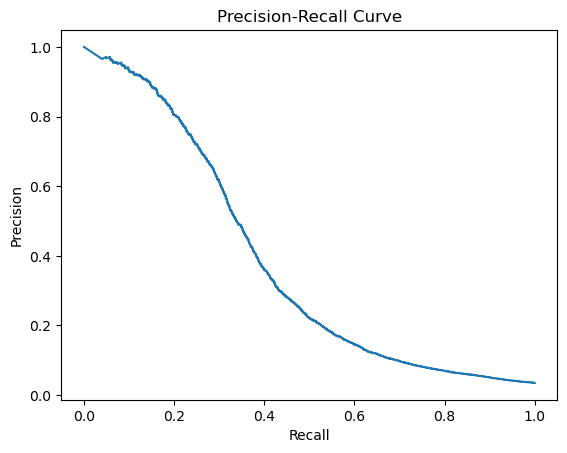

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# assume `model` is your trained sequential model
y_pred = model.predict(X_val)
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)

# plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


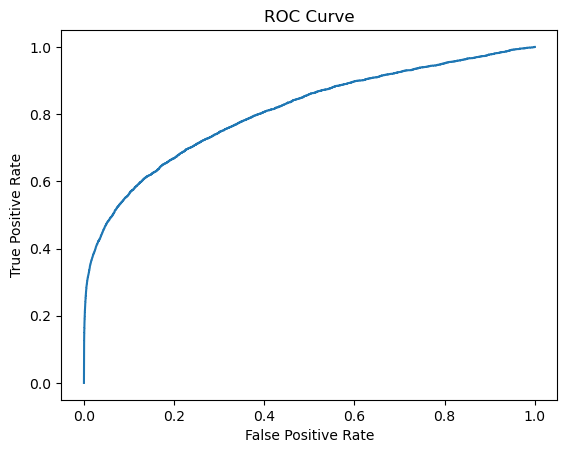

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# assume `model` is your trained Keras model
# y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

In [35]:
model2 = keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

recall2 = tf.keras.metrics.Recall(name='recall2')
auc2 = tf.keras.metrics.AUC(name='auc2')
model2.compile(
    optimizer=optimizer,
    loss='binary_crossentropy', 
    metrics=[recall2, auc2]
    )

In [40]:
checkpoint_callback2 = ModelCheckpoint(
    filepath='model/model2.{epoch:02d}-{val_recall2:.2f}.h5',
    monitor="val_recall2", # monitor the validation recall
    save_best_only=True, # save only the best performing model
    save_weights_only=True, # save only the weights of the model, not the entire model
    mode="max", # maximize the validation recall
    verbose=1 # print messages when saving the model,
)

In [51]:
reduce_lr2 = ReduceLROnPlateau(monitor='val_recall2', factor=0.1, patience=8, min_lr=0, mode='max', cooldown=2)

In [52]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=4096, verbose=1, callbacks=[checkpoint_callback2, reduce_lr2])

Epoch 1/50
116/116 [==============================] - ETA: 0s - loss: 0.1081 - recall2: 0.2301 - auc2: 0.8461
Epoch 1: val_recall2 did not improve from 0.65473
116/116 [==============================] - 65s 554ms/step - loss: 0.1081 - recall2: 0.2301 - auc2: 0.8461 - val_loss: 0.1067 - val_recall2: 0.2134 - val_auc2: 0.8543 - lr: 0.0100
Epoch 2/50
116/116 [==============================] - ETA: 0s - loss: 0.1072 - recall2: 0.2381 - auc2: 0.8483
Epoch 2: val_recall2 did not improve from 0.65473
116/116 [==============================] - 4s 30ms/step - loss: 0.1072 - recall2: 0.2381 - auc2: 0.8483 - val_loss: 0.1051 - val_recall2: 0.2475 - val_auc2: 0.8552 - lr: 0.0100
Epoch 3/50
115/116 [============================>.] - ETA: 0s - loss: 0.1074 - recall2: 0.2363 - auc2: 0.8480
Epoch 3: val_recall2 did not improve from 0.65473
116/116 [==============================] - 3s 26ms/step - loss: 0.1074 - recall2: 0.2362 - auc2: 0.8481 - val_loss: 0.1075 - val_recall2: 0.2543 - val_auc2: 0.8522 

In [55]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001)

In [56]:
model2 = keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

recall2 = tf.keras.metrics.Recall(name='recall2')
auc2 = tf.keras.metrics.AUC(name='auc2')
model2.compile(
    optimizer=optimizer,
    loss='binary_crossentropy', 
    metrics=[recall2, auc2]
    )

In [58]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=2048, verbose=1, callbacks=[checkpoint_callback2, reduce_lr2])

Epoch 1/50
231/231 [==============================] - ETA: 0s - loss: 0.7909 - recall2: 0.5088 - auc2: 0.5306
Epoch 1: val_recall2 did not improve from 0.65473
231/231 [==============================] - 67s 283ms/step - loss: 0.7909 - recall2: 0.5088 - auc2: 0.5306 - val_loss: 0.4878 - val_recall2: 0.1490 - val_auc2: 0.6103 - lr: 0.0010
Epoch 2/50
231/231 [==============================] - ETA: 0s - loss: 0.6468 - recall2: 0.3708 - auc2: 0.5377
Epoch 2: val_recall2 did not improve from 0.65473
231/231 [==============================] - 4s 19ms/step - loss: 0.6468 - recall2: 0.3708 - auc2: 0.5377 - val_loss: 0.5159 - val_recall2: 0.1219 - val_auc2: 0.6352 - lr: 0.0010
Epoch 3/50
231/231 [==============================] - ETA: 0s - loss: 0.5542 - recall2: 0.2730 - auc2: 0.5353
Epoch 3: val_recall2 did not improve from 0.65473
231/231 [==============================] - 4s 18ms/step - loss: 0.5542 - recall2: 0.2730 - auc2: 0.5353 - val_loss: 0.4295 - val_recall2: 0.1028 - val_auc2: 0.6404 

## Undersampling the Data

In [59]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [60]:
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)

In [63]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [61]:
X_val_rus, y_val_rus = rus.fit_resample(X_val, y_val)

In [64]:
y_train_rus.value_counts(normalize=True)

isFraud
0    0.909091
1    0.090909
Name: proportion, dtype: float64

In [65]:
y_val_rus.value_counts(normalize=True)

isFraud
0    0.909091
1    0.090909
Name: proportion, dtype: float64

In [66]:
len(X_train_rus)

181830

In [68]:
len(X_train)

472432

In [88]:
# recall_callback = RecallCallback(validation_data=(X_val_rus, y_val_rus))

In [100]:
callbacks = [reduce_lr, recall_callback, checkpoint_callback]

In [101]:
# define the ANN model
model = keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[X_train_rus.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

recall = tf.keras.metrics.Recall(name='recall')
auc = tf.keras.metrics.AUC(name='auc')

# compile the model
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=[auc, recall])

# fit the model on the training data
hist = model.fit(X_train_rus, y_train_rus, epochs=16, batch_size=1024, validation_data=(X_val_rus, y_val_rus), verbose=1, callbacks=callbacks)

Epoch 1/16
1421/1421 [==============================] - 3s 2ms/step
Epoch 0 => ROC-AUC: 0.5052 - Recall: 0.0070 - False Positive Rate: 0.0004

Epoch 1: val_recall did not improve from 0.80595
89/89 [==============================] - 84s 939ms/step - loss: 36.2988 - auc: 0.5178 - recall: 0.1471 - val_loss: 33.4843 - val_auc: 0.5052 - val_recall: 0.0070 - lr: 0.0010 - false_positive_rate: 4.3552e-04
Epoch 2/16
89/89 [==============================] - ETA: 0s - loss: 21.6272 - auc: 0.5378 - recall: 0.1647Epoch 1 => ROC-AUC: 0.5728 - Recall: 0.8853

Epoch 2: val_recall improved from 0.80595 to 0.88531, saving model to model_checkpoint.h5
89/89 [==============================] - 2s 20ms/step - loss: 21.6272 - auc: 0.5378 - recall: 0.1647 - val_loss: 11.4560 - val_auc: 0.5728 - val_recall: 0.8853 - lr: 0.0010 - false_positive_rate: nan
Epoch 3/16
89/89 [==============================] - ETA: 0s - loss: 17.0634 - auc: 0.5447 - recall: 0.1880Epoch 2 => ROC-AUC: 0.5021 - Recall: 0.0022

Epoch 3

1421/1421 [==============================] - 2s 2ms/step


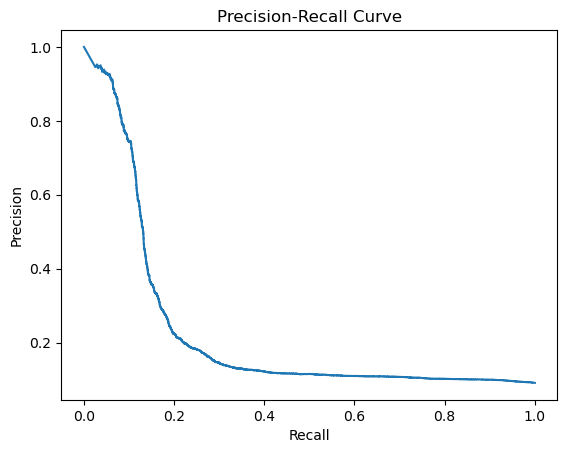

In [95]:
# assume `model` is your trained sequential model
y_pred = model.predict(X_val_rus)
precision, recall, thresholds = precision_recall_curve(y_val_rus, y_pred)

# plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

<Axes: xlabel='epoch', ylabel='recall'>

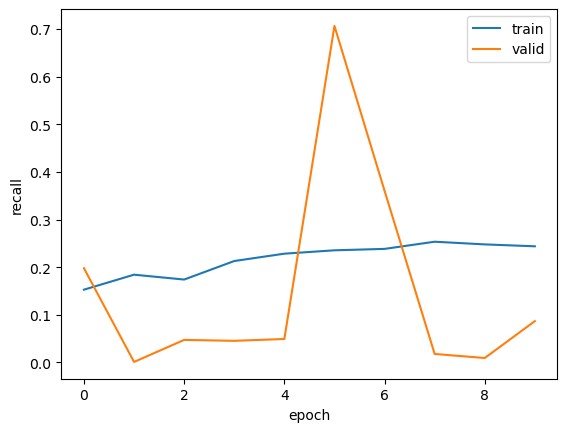

In [96]:
history_df = pd.DataFrame(hist.history)
history_df['epoch'] = hist.epoch

sns.lineplot(data = history_df, x='epoch', y='recall', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_recall', label='valid')

<Axes: xlabel='epoch', ylabel='auc'>

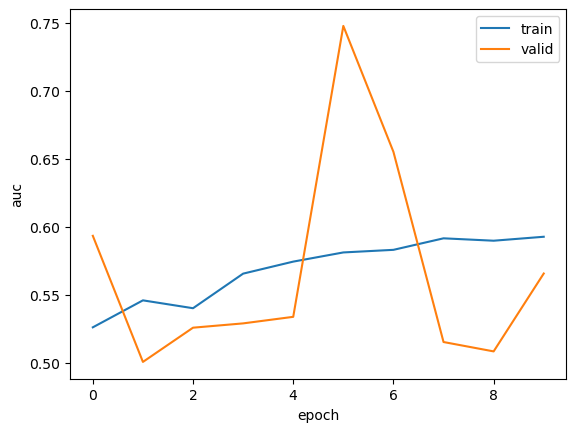

In [97]:
sns.lineplot(data = history_df, x='epoch', y='auc', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_auc', label='valid')